# problem statement: MOVIE RATING PREDICTION
Create a model that forecasts the evaluation of a film 
depending on characteristics such as genre, director, and 
actors. You can employ regression methodologies to address 
this issue. The objective is to examine past movie data and 
construct a model that effectively predicts the rating 
assigned to a movie by users or reviewers.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
from sklearn.model_selection import train_test_split

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
from sklearn.metrics import accuracy_score

In [193]:
from sklearn.svm import SVC, LinearSVC

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
from sklearn.naive_bayes import GaussianNB

In [200]:
from sklearn.linear_model import Perceptron

In [203]:
from sklearn.linear_model import SGDClassifier

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
columns = ['MovieIDs','MovieName','Category']
df_movies=pd.read_csv( "C:\\Users\\shankar\\Documents\\data analytics data sets\\MOVIE RATING DATA SETS\\movies.dat" , engine = 'python' , delimiter = '::' ,encoding = 'ISO-8859-1')
df_movies.columns=columns


In [23]:
df_movies.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [26]:
df_movies.shape

(3882, 3)

In [29]:
df_movies.dropna(inplace=True)

In [31]:
df_movies.size

11646

In [54]:
r_col=['ID','MovieID','Ratings','TimeStamp']
df_rating=pd.read_csv("C:\\Users\\shankar\\Documents\\data analytics data sets\\MOVIE RATING DATA SETS\\ratings.dat" , engine = 'python' , sep = '::' , encoding = 'ISO-8859-1')

In [55]:
df_rating.columns=r_col

In [56]:
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [57]:
df_rating.shape

(1000208, 4)

In [58]:
df_rating.size

4000832

In [59]:
df_rating.dropna(inplace=True)

In [42]:
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [44]:
df_rating.shape

(1000208, 4)

In [45]:
df_rating.size

4000832

In [60]:
df_user = pd.read_csv("C:\\Users\\shankar\\Documents\\data analytics data sets\\MOVIE RATING DATA SETS\\users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [65]:
df=pd.concat([df_movies , df_rating , df_user], axis = 1)

In [69]:
df.head(10)

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,F,25.0,1.0,04093


In [124]:
duplicate_count=df['MovieName'].duplicated(keep=False).sum() 
duplicate_count
#df['MovieName']       #1000208

996326

In [67]:
df.shape

(1000208, 12)

In [68]:
df.columns

Index(['MovieIDs', 'MovieName', 'Category', 'ID', 'MovieID', 'Ratings',
       'TimeStamp', 'UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
      dtype='object')

# Visualizing Age Distribution

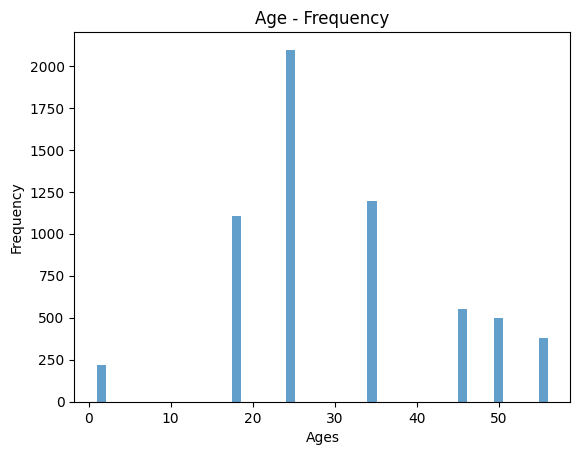

In [79]:
plt.hist(df.Age,bins=50 , alpha = 0.7 )
plt.title('Age - Frequency')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

In [110]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:20]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


# Visualize overall rating by users

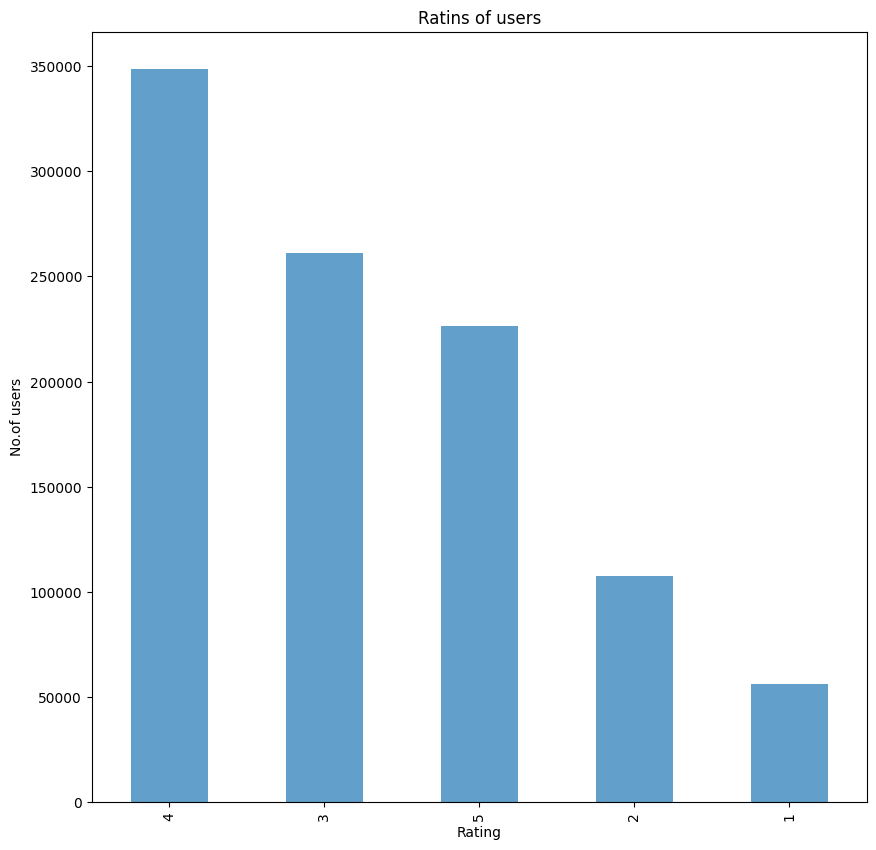

In [111]:
df_rating['Ratings'].value_counts().plot(kind='bar' , alpha=0.7 , figsize=(10,10))
plt.title('Ratins of users')
plt.ylabel('No.of users')
plt.xlabel('Rating')
plt.show()

In [112]:
groupby_movieName = df.groupby('MovieName')
groupby_rating = df.groupby('Ratings')
groupby_uid = df.groupby('UserID')

In [128]:
movies = df.groupby('MovieName').size().sort_values(ascending =False)[:1000]
movies

MovieName
$1,000,000 Duck (1971)                1
Outlaw Josey Wales, The (1976)        1
Only Angels Have Wings (1939)         1
Only You (1994)                       1
Open Season (1996)                    1
                                     ..
Toxic Avenger, Part II, The (1989)    1
Toxic Avenger, The (1985)             1
Toy Story 2 (1999)                    1
Toys (1992)                           1
Trading Places (1983)                 1
Length: 1000, dtype: int64

In [114]:
ToyStory_data = groupby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

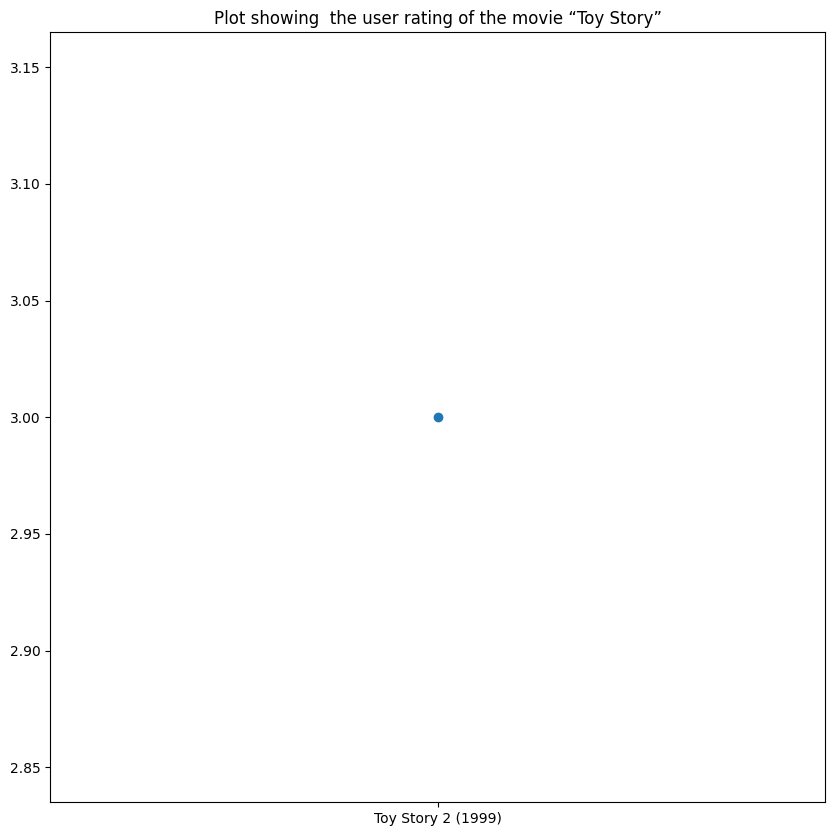

In [115]:
## Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()


In [116]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


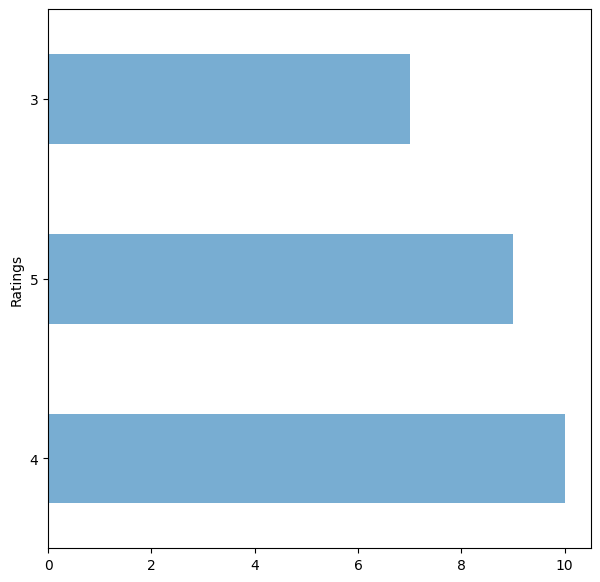

In [133]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[:26]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [136]:
#Visualize the rating data by user id
userid_2696 = groupby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


# Perform machine learning on first 500 records

In [140]:
#First 500 extracted records
first_500 = df[:501]
first_500.dropna(inplace=True)
first_500.head()

C:\Windows\Temp\ipykernel_2956\693204965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,age_group
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072,50-59
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117,20-29
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460,40-49
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455,20-29
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117,50-59


In [142]:
#Extracting features from df : movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

array([[6.610e+02, 5.600e+01, 1.600e+01],
       [9.140e+02, 2.500e+01, 1.500e+01],
       [3.408e+03, 4.500e+01, 7.000e+00],
       ...,
       [2.966e+03, 1.800e+01, 2.000e+00],
       [2.660e+02, 2.500e+01, 2.000e+00],
       [1.700e+01, 3.500e+01, 6.000e+00]])

In [150]:
#Use rating as label
labels = first_500[['Ratings']].values

In [179]:
#splitting train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [192]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
accuracy = accuracy_score(test_labels, Y_pred)
accu=round(accuracy*100 , 2)
accu

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34.94

In [194]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


36.12

In [196]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


57.91

In [198]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


37.01

In [201]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.45

In [202]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


17.91

In [204]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27.16

In [206]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

99.7

In [207]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\shankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


99.7

In [208]:
# Model and their accuracy scores in percentage
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.70
8,Decision Tree,99.70
1,KNN,57.91
4,Naive Bayes,37.01
0,Support Vector Machines,36.12
2,Logistic Regression,36.12
6,Stochastic Gradient Decent,27.16
7,Linear SVC,17.91
5,Perceptron,10.45
